In [0]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 40kB 2.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=a6365c74c9bf55424aee52d00e949887ce50cf515d074a82dab1ca066bf7734c
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=3da4f8a502f2aad275e5faf6418f6328f2dab674349ebc2a5fd6764e1aefee40
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=1ce8a4688960981a66e80daca11ebdbea69427cdf9a9429234acf61575c792ca
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.1MB 6.4MB/s 


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import bert
import numpy as np
print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)

TensorFlow Version: 2.2.0
Hub version:  0.8.0


In [0]:
bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=True)

In [0]:
def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens,)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

In [0]:
def get_masks(tokens, max_seq_length):
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

In [0]:
def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

In [0]:
pooled_output.shape

NameError: ignored

In [0]:
sequence_output.shape

In [0]:
FullTokenizer=bert.bert_tokenization.FullTokenizer
FullTokenizer

bert.tokenization.bert_tokenization.FullTokenizer

In [0]:
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
vocab_file

b'/tmp/tfhub_modules/03d6fb3ce1605ad9e5e9ed5346b2fb9623ef4d3d/assets/vocab.txt'

In [0]:
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()

In [0]:
tokenizer=FullTokenizer(vocab_file,do_lower_case)
tokenizer

In [0]:
import pandas as pd
 
df=pd.read_csv('drive/My Drive/train.csv')
 #to make random use sample
df = df.sample(frac=1)

In [0]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
97967,0c13ce13a23b5341,The page says Director and Creator. I am look...,0,0,0,0,0,0
30307,507b052b527e7531,"""\n\n Would you do me a favor... \n\n...and bl...",1,0,0,0,1,0
69653,ba529fcfcaf1253a,"Sorry, I think you are right, Sturm-Liouville ...",0,0,0,0,0,0
41340,6e40926da434c39b,Officialsixsixsix\n\nHi. You may want to revis...,0,0,0,0,0,0
43263,737ad4657f8cda09,"Also I will, from now on, keep my pings to a m...",0,0,0,0,0,0


In [0]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [0]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_y = df[list_classes].values
train_y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [0]:
df['comment_text'].head()

97967    The page says Director and Creator.  I am look...
30307    "\n\n Would you do me a favor... \n\n...and bl...
69653    Sorry, I think you are right, Sturm-Liouville ...
41340    Officialsixsixsix\n\nHi. You may want to revis...
43263    Also I will, from now on, keep my pings to a m...
Name: comment_text, dtype: object

In [0]:
stokens = tokenizer.tokenize(df['comment_text'][142226])
  
stokens = stokens[:126]

stokens = ["[CLS]"] + stokens + ["[SEP]"]

ids = get_ids(stokens, tokenizer, 128)
masks = get_masks(stokens, 128)
segments = get_segments(stokens, 128)

In [0]:
print(stokens)
print(ids)
print(masks)
print(segments)

['[CLS]', 'you', 'are', 'a', 'flaming', 'tu', '##rd', '##mun', '##cher', '.', 'not', 'only', 'do', 'you', 'dev', '##our', 'tu', '##rds', ',', 'you', 'enjoy', 'it', '.', 'i', 'hope', 'that', 'michael', 'vic', '##k', 'gives', 'you', 'gen', '##ital', 'her', '##pes', '.', 'you', 'will', 'probably', 'enjoy', 'that', 'too', '.', 'you', 'stink', '.', 'henry', 'hudson', 'really', 'was', 'a', 'butt', '##mun', '##ch', ',', 'and', 'i', 'feel', 'that', 'the', 'world', 'needs', 'to', 'hear', 'of', 'his', 'butt', '##mun', '##ching', 'ways', '.', 'thanks', 'for', 'nothing', ',', 'dick', '##face', '.', '[SEP]']
[101, 2017, 2024, 1037, 19091, 10722, 4103, 23041, 7474, 1012, 2025, 2069, 2079, 2017, 16475, 8162, 10722, 17811, 1010, 2017, 5959, 2009, 1012, 1045, 3246, 2008, 2745, 10967, 2243, 3957, 2017, 8991, 18400, 2014, 10374, 1012, 2017, 2097, 2763, 5959, 2008, 2205, 1012, 2017, 27136, 1012, 2888, 6842, 2428, 2001, 1037, 10007, 23041, 2818, 1010, 1998, 1045, 2514, 2008, 1996, 2088, 3791, 2000, 2963, 1

In [0]:
print(len(stokens))
print(len(ids))
print(len(masks))
print(len(segments))

79
128
128
128


In [0]:
input_ids, input_masks, input_segments = np.zeros((159571, 128)), np.zeros((159571, 128)), np.zeros((159571, 128))

for i, sentence in enumerate(df['comment_text'].values):
  stokens = tokenizer.tokenize(sentence)
  
  stokens = stokens[:126]
  
  stokens = ["[CLS]"] + stokens + ["[SEP]"]
 
  ids = get_ids(stokens, tokenizer, 128)
  masks = get_masks(stokens, 128)
  segments = get_segments(stokens, 128)


  input_ids[i] = ids
  input_masks[i] = masks
  input_segments[i] = segments

In [0]:
type(input_ids)

numpy.ndarray

In [0]:
input_ids.shape

(159571, 128)

In [0]:
MAX_SEQ_LEN=128
input_word_ids = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32,
                                    name="segment_ids")

In [0]:
bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=True)

In [0]:
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

In [0]:
sequence_output.shape

TensorShape([None, None, 768])

In [0]:
x = tf.keras.layers.GlobalAveragePooling1D()(sequence_output)
x = tf.keras.layers.Dropout(0.2)(x)
out = tf.keras.layers.Dense(6, activation="sigmoid", name="dense_output")(x)
 
model = tf.keras.models.Model(
      inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
 
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [0]:
inputs = [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]

In [0]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='drive/My Drive/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [0]:
pip install livelossplot

In [0]:
from livelossplot import PlotLossesKeras

In [0]:
history = model.fit(inputs, train_y, validation_split=0.15, batch_size=16, callbacks=[checkpoint], epochs=2)

Epoch 1/2
8478/8478 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9486INFO:tensorflow:Assets written to: model-001.model/assets


INFO:tensorflow:Assets written to: model-001.model/assets


8478/8478 [==============================] - 7185s 847ms/step - loss: 0.1426 - accuracy: 0.9486 - val_loss: 0.1505 - val_accuracy: 0.9942
Epoch 2/2
8478/8478 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9941INFO:tensorflow:Assets written to: model-002.model/assets


INFO:tensorflow:Assets written to: model-002.model/assets


8478/8478 [==============================] - 7173s 846ms/step - loss: 0.1413 - accuracy: 0.9941 - val_loss: 0.1494 - val_accuracy: 0.9942


In [0]:
model.save("model.h5")

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


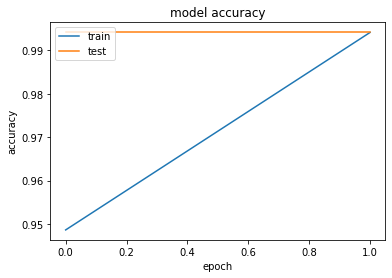

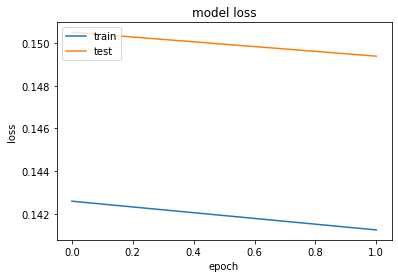

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('drive/My Drive/test.csv')

In [0]:
df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [0]:
temp = len(df['comment_text'].values)
temp

153164

In [0]:
input_ids, input_masks, input_segments = np.zeros((temp, 128)), np.zeros((temp, 128)), np.zeros((temp, 128))

for i, sentence in enumerate(df['comment_text'].values):
  stokens = tokenizer.tokenize(sentence)
  
  stokens = stokens[:126]
  
  stokens = ["[CLS]"] + stokens + ["[SEP]"]
 
  ids = get_ids(stokens, tokenizer, 128)
  masks = get_masks(stokens, 128)
  segments = get_segments(stokens, 128)


  input_ids[i] = ids
  input_masks[i] = masks
  input_segments[i] = segments

In [0]:
inputs = [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]

In [0]:
df=pd.read_csv('drive/My Drive/test_labels.csv')

In [0]:
df.head(7)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1


In [0]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
test_y = -df[list_classes]
test_y[1000:1005]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
1000,1,1,1,1,1,1
1001,1,1,1,1,1,1
1002,0,0,0,0,0,0
1003,0,0,0,0,0,0
1004,1,1,1,1,1,1


In [0]:
model.evaluate(inputs, test_y, batch_size=16)

9573/9573 [==============================] - 2594s 271ms/step - loss: 2.1382 - accuracy: 0.9603


[2.1381993293762207, 0.9603301286697388]

In [0]:
model = tf.keras.models.load_model('drive/My Drive/model-001.model')

In [0]:
pred = model.predict(inputs[:5])